# Visualize your strategies

Hi everyone! 👋

I'm 😅ing ⚽⚽ with this competition... 

One issue I'm having is that I start with an initial Matrix as a problem, and my _trained babies_ give me a final state on that Matrix as a solution **that I cannot understand**, "How the F*** did they get there?" 😕🤔

So I decided to plot all the steps with a `Player` from `Ipywidgets`. Everything is very dumb, the player only receives a list of intermediate states of the Matrix and plots them one by one, but so far it has been really useful!!! (I hope you enjoy it too 🥺)

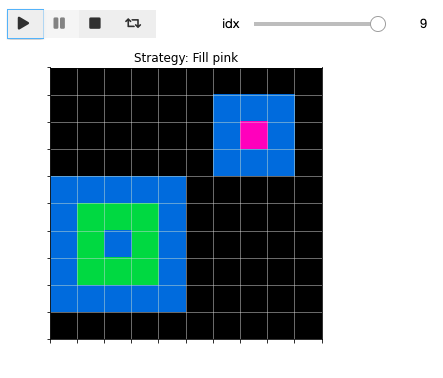

## Imports

The usual...

In [ ]:
from IPython.display import display, clear_output
import ipywidgets as ipy

import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np

## Plot One Sample

In [ ]:
def plot_one(input_matrix, title='Image', size=(5, 5)):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    _, ax = plt.subplots(1, 1, figsize=size)

    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

## Creating the data

Dumb example.

In [ ]:
# Initial matrix
A = np.zeros((10, 10))
A[1:2, 6:9] = 1
A[3:4, 6:9] = 1
A[2, 6]=1
A[2, 8] = 1
A[4:9, 0:1] = 1
A[4:9, 4:5] = 1
A[4:5, 1:4] = 1
A[8:9, 1:4] = 1
A[6, 2] = 1

In [ ]:
plot_one(A)

In [ ]:
# Sequential filling
green = 3
pink = 6
fills = [(5, 1, green), (5, 2, green), (5, 3, green), (6, 3, green), (7, 3, green), 
         (7, 2, green), (7, 1, green), (6, 1, green), (2, 7, pink)]

In [ ]:
# Generate evolution of original matrix
steps = [A.copy()]
for (i, j, color) in fills:
    A[i, j] = color
    steps.append(A.copy())

In [ ]:
# Not a mandatory param, but maybe you want to link the state of a matrix to a specific strategy
strategies = ['Initial stage'] + ['Fill green']*8 + ['Fill pink']

## Widget definition

The magic 🧙‍♂️! Actually I'm just gathering a few widgets and putting them together...

In [ ]:
class PlayerAndImage():
    
    def __init__(self, steps, strategies=[], pause=500, start_step=0):
        self.steps = steps
        self.n = len(steps)
        self.pause = pause
        self.start_step = start_step

    def update(self, idx):
        with self.out:
            clear_output(wait=True)
            title = (strategies and f"Strategy: {strategies[idx]}") or None
            plot_one(steps[idx], title=title)
            plt.show()

    def make_player_and_image(self):

        self.out = ipy.Output(layout=ipy.Layout(width='400px', height='400px'))

        # Slider widget
        slider = ipy.IntSlider(min=0, max=self.n-1, orientation='horizontal')
        ipy.interactive(self.update, idx=slider)
        
        # Play widget
        play = ipy.Play(
            value=self.start_step,
            min=0,
            max=self.n-1,
            step=1,
            interval=self.pause,
            description="Press play",
            disabled=False
        )
        
        # Linking the Play widget and the Slider widget so they get updated together.
        ipy.jslink((play, 'value'), (slider, 'value'))

        # Some layout specs.
        layout = ipy.Layout(
            display = 'flex',
                        flex_flow = 'col',
                        justify_content = 'space-between',
                        align_items = 'center',
            )
        
        # Image initialization, show the initial step.
        self.update(self.start_step)
        
        # Pairing Play and Slide widgets horizontally
        h_box = ipy.HBox(children=(play, slider))

        # Pairing Vertically with the output
        widgets = ipy.VBox(children=(h_box, self.out), layout = layout)
        
        return widgets

## Let's give it a try!

In [ ]:
s = PlayerAndImage(steps, strategies=strategies, pause=500)
slider = s.make_player_and_image()
display(slider)